# Semivariogram models

## Table of Contents:

1. Create random surface,
2. Create the experimental variogram,
3. Set all variogram models,
4. Compare variogram models.

## Level: Basic

## Changelog

| Date | Change description | Author |
|------|--------------------|--------|
| 2022-08-16 | The first release of tutorial | @SimonMolinsky |

## Introduction

`Pyinterpolate` allows us to use multiple variogram models for your analysis. All of them are derived from literature. In this tutorial, we will compare those models on an artificial surface. We will learn:

- how to create an artificial surface with Python,
- what variogram models are available for us,
- what are the differences between variogram models.

## Import packages

In [1]:
from scipy.signal import convolve2d
from scipy.sparse import coo_matrix

from pyinterpolate import build_experimental_variogram
from pyinterpolate.variogram.theoretical.models import *

import matplotlib.pyplot as plt

## 1) Create a random surface

In the first step, we will create the artificial surface. The reason why we choose an artificial object instead of real-world observations is that we have more control over variogram parameters. We want to compare different models, thus we should limit the number of unknowns in our dataset to a bare minimum. But don't be disappointed! Our surface won't be *boring* because we will generate it from an interesting function named [logistic_map](https://en.wikipedia.org/wiki/Logistic_map). It is the polynomial mapping that, for some parameters, presents chaotic behavior.

**Logistic map** is a recurrent relation of the form:

$$x_{n+1} = rx_{n}(1-x_{n}),$$

where:
- $x$: is a mapped value at a step $n$ or $n+1$, its state depends only on the previous step and initial set of parameters, $x \in [0, 1]$.
- $r$: is a special parameter and its value leads to different behavior of a system. For us, the most important is a set of possible $r$ values within limits $[3.5, 4]$ where the system has chaotic behavior [more](https://en.wikipedia.org/wiki/Logistic_map#Behavior_dependent_on_r).

We will use `generate_logistic_map` function that takes 3 parameters:

- `r`: the same as $r$ from the **logistic map** system, we set it to **3.9**.
- `size`: the length of a generated sequence, it should be reasonably large to create a surface, we set it to **10k**.
- `initial_ratio`: initial `x` value between 0 and 1. We set it to **0.33**.

In [2]:
# Create logistic map

def generate_logistic_map(r: float, size: int, initial_ratio: float) -> np.array:
    # rxn(1-xn)
    vals = [initial_ratio]
    for _ in range(size-1):
        new_val = r * vals[-1] * (1 - vals[-1])
        vals.append(new_val)
    return np.array(vals)

In [3]:
values = generate_logistic_map(3.9, 10000, 0.33)

At this point, our data is a **1-D** array and we can represent it as a signal:

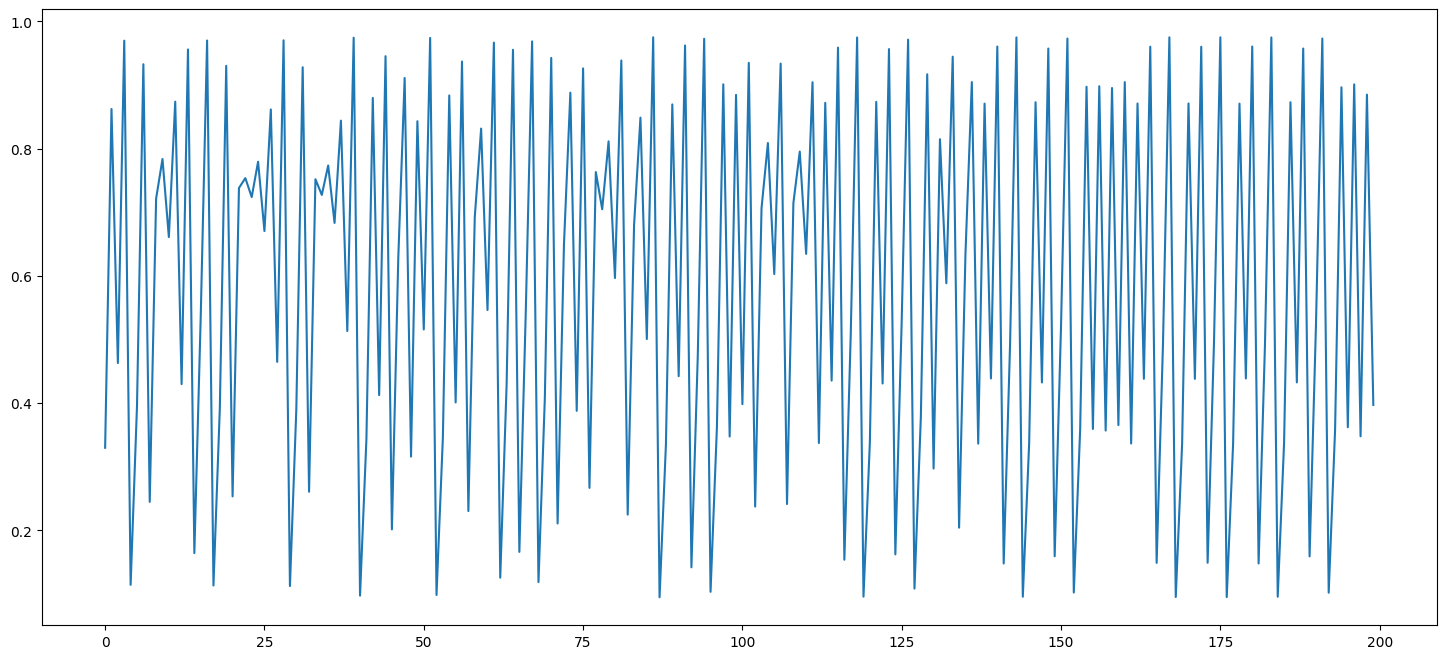

In [4]:
plt.figure(figsize=(18, 8))
plt.plot(values[0:200])
plt.show()

Let's reshape this signal into a **2-D** matrix:

In [5]:
# Create surface from array

surface = np.reshape(values, (100, 100))

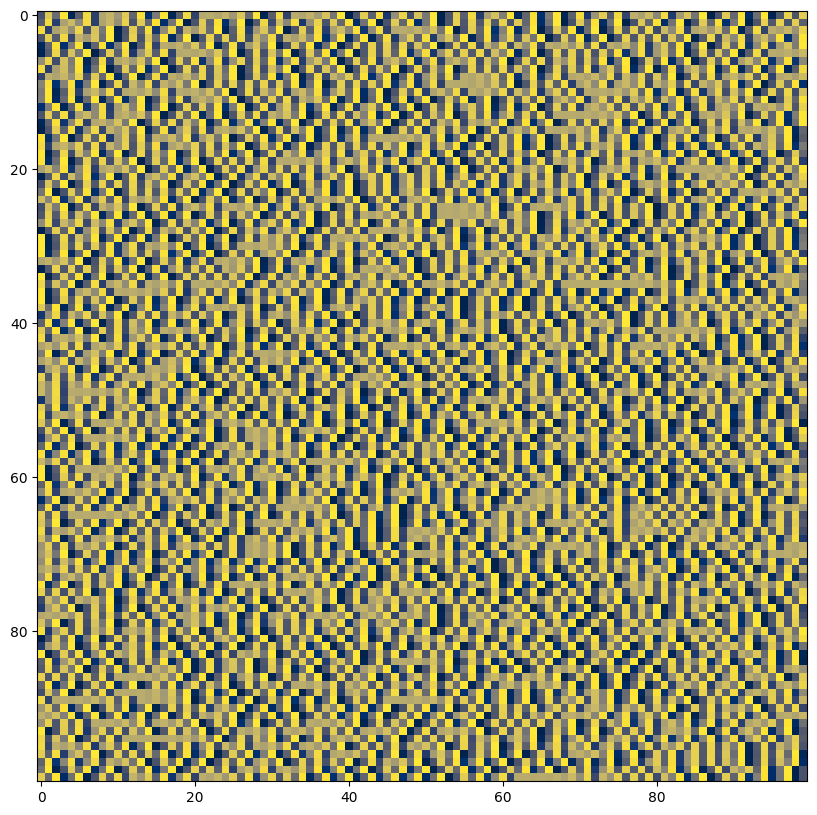

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(surface, cmap='cividis')
plt.show()

The spatial correlation of this structure is very weak, we can change it with a simple blur filter. It's size will be our **range** parameter!

In [7]:
# Slightly blur image with simple mean filter

mean_filter = np.ones(shape=(7, 7))

surf_blurred = convolve2d(surface, mean_filter, boundary='wrap')

And here we are! We have our artificial surface for testing purposes!

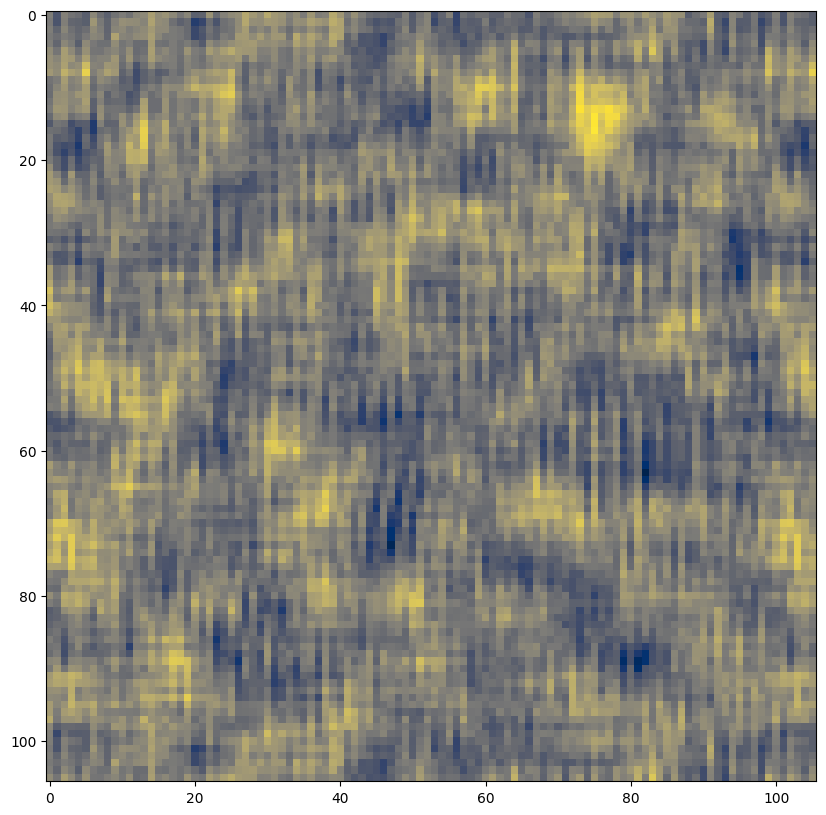

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(surf_blurred, cmap='cividis')
plt.show()

## 2) Create the experimental variogram

We must create the experimental variogram before we start comparing theoretical models. For this our 2-D surface must be transformed into an array:

```
[[coordinate x1, coordinate y1, value1],
 [coordinate x2, coordinate y2, value2],
 [...],]
```

The path to transform 2D surface into pixel coordinates has two steps. In the first step, we use `scipy` to make a sparse representation of the surface, and in the second step, we use `numpy` to transform the sparse representation into an array:


In [9]:
# Transform data into x, y, val array

In [10]:
sparse_data = coo_matrix(surf_blurred)

In [11]:
# data, col, row == value, x, y

In [12]:
xyval = np.asarray([sparse_data.col, sparse_data.row, sparse_data.data]).T

We know our data - the effective range of correlation is 7 steps, and we have set the mean filter into this size. With this knowledge, we will set `step_size` into 2 units and `max_range` into 20 (way above the real maximum range, that is 7, but we show in this way how variograms behave at a large distance).

In [13]:
# Get experimental variogram

In [ ]:
experimental = build_experimental_variogram(xyval, 2, 20)

In [ ]:
semivars = experimental.experimental_semivariance_array.copy()

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(semivars[:, 0], semivars[:, 1])
plt.show()

We read a plot and decide to set:

- **nugget** to `0`,
- **sill** to `1.3`,
- **range** to `7`,
- **lags** to list of distances from 2 to 18.

Yes, we can create the theoretical variogram from scratch, without calling the `build_theoretical_variogram()` function or the `TheoreticalVariogram` class. Those three parameters and the lags are all that we need for modeling.

In [ ]:
# Set nugget, sill and range

In [ ]:
_nugget = 0
_sill = 1.3
_range = 7
_lags = semivars[:, 0].copy()

## 3) Set all variogram models

Variogram models are imported as external functions, and they are not a part of any object. We can use this fact, import all models, and calculate their outputs. In this step, we will calculate seven different theoretical models and show them compared to the experimental variogram.

Models to calculate:

- circular,
- cubic,
- exponential,
- gaussian,
- linear,
- power,
- spherical.

In [ ]:
# Crete different models: circular, cubic, exponential, gaussian, linear, power, spherical

In [ ]:
circular = circular_model(lags=_lags,
                          nugget=_nugget,
                          sill=_sill,
                          rang=_range)

cubic = cubic_model(lags=_lags,
                    nugget=_nugget,
                    sill=_sill,
                    rang=_range)

exponential = exponential_model(lags=_lags,
                                nugget=_nugget,
                                sill=_sill,
                                rang=_range)

gaussian = gaussian_model(lags=_lags,
                          nugget=_nugget,
                          sill=_sill,
                          rang=_range)

linear = linear_model(lags=_lags,
                      nugget=_nugget,
                      sill=_sill,
                      rang=_range)

power = power_model(lags=_lags,
                    nugget=_nugget,
                    sill=_sill,
                    rang=_range)

spherical = spherical_model(lags=_lags,
                            nugget=_nugget,
                            sill=_sill,
                            rang=_range)

With all models calculated, let's take a look at their output. Before we jump into the last step, try to guess which model works optimally with the experimental variogram? (It is a tricky question!)

In [ ]:
# Plot circular

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, circular)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Circular'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

In [ ]:
# Plot cubic

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, cubic)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Cubic'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

In [ ]:
# Plot exponential

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, exponential)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Exponential'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

In [ ]:
# Plot gaussian

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, gaussian)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Gaussian'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

In [ ]:
# Plot linear

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, linear)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Linear'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

In [ ]:
# Plot power

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, power)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Power'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

In [ ]:
# Plot spherical

plt.figure(figsize=(15, 6))
plt.scatter(_lags, semivars[:, 1])
plt.plot(_lags, spherical)
plt.legend(['Experimental Semivariance', 'Modeled Curve - Spherical'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

What was your guess?

.
.
.

I hope we both have chosen `circulcar` or `linear` models! But we should be careful with the final opinion and even more careful if we let the algorithm decide which model is the best based on the **root mean squared error metric** (RMSE). For us, the best model is always the model that has the best fit for the closest distances. A model with low RMSE may be "great" with distances from 10 to 18... which oscillate around the sill of our data and are useless for weighting (weight is constant from some distance).

## 4) Compare variogram models

The last part is a comparison of variogram models. We will still use our "own eyes" to decide which model is the best, but this time we will plot all of them in a single plot.

In [ ]:
# Plot ALL models

plt.figure(figsize=(20, 8))
plt.scatter(_lags, semivars[:, 1], color='#762a83')
plt.plot(_lags, circular, ':8', color='#9970ab', mec='black')
plt.plot(_lags, cubic, ':s', color='#c2a5cf', mec='black')
plt.plot(_lags, exponential, ':p', color='#e7d4e8', mec='black')
plt.plot(_lags, gaussian, ':+', color='#d9f0d3', mec='black')
plt.plot(_lags, linear, ':2', color='#a6dba0', mec='black')
plt.plot(_lags, power, ':*', color='#5aae61', mec='black')
plt.plot(_lags, spherical, ':o', color='#1b7837', mec='black')
plt.title('Comparison of theoretical semivariance models')
plt.legend(['Experimental Semivariance',
            'Circular',
            'Cubic',
            'Exponential',
            'Gaussian',
            'Linear',
            'Power',
            'Spherical'])
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

We observe that the lowest distance from a modeled value to the experimental curve at a small distance has...

---